#Data read and set Column name

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Correct file path
file_path = 'einkommen.train'

# Try to read the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,30,Private,55481,Masters,14,Never-married,Tech-support,Unmarried,White,Male,0,0,45,Nicaragua,?
29995,48,Private,119471,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,0,0,56,Philippines,?
29996,61,Local-gov,167347,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,35,United-States,?
29997,41,Private,184378,HS-grad,9,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,?


In [ ]:
# Column names
column_names = ['age', 'employment_type', 'weighting_factor', 'education_level',
                'schooling_period', 'marital_status', 'employment_area', 'partnership',
                'ethnicity', 'gender', 'financial_gains', 'financial_losses',
                'weekly_working_time', 'country_of_birth', 'income']

# Try to read the dataset and assign column names
data = pd.read_csv(file_path, names=column_names, header=None)

# Reset the index and add 1
data.index = data.index + 1

# Display the first few rows of the dataset
data

,age,employment_type,weighting_factor,education_level,schooling_period,marital_status,employment_area,partnership,ethnicity,gender,financial_gains,financial_losses,weekly_working_time,country_of_birth,income
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,30,Private,55481,Masters,14,Never-married,Tech-support,Unmarried,White,Male,0,0,45,Nicaragua,?
29997,48,Private,119471,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,0,0,56,Philippines,?
29998,61,Local-gov,167347,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,35,United-States,?
29999,41,Private,184378,HS-grad,9,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,?


#Check Missing Values

In [ ]:
# Strip whitespace from all data in the DataFrame
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Replace '?' with NaN
data.replace('?', pd.NA, inplace=True)

# Count the missing values
missing_values_count = data.isna().sum()

print("\nMissing values count for each column:")
print(missing_values_count)

# If you want the total number of missing values in the dataset:
total_missing_values = missing_values_count.sum()
print(f"\nTotal number of missing values in the dataset: {total_missing_values}")


Missing values count for each column:
age                        0
employment_type         1677
weighting_factor           0
education_level            0
schooling_period           0
marital_status             0
employment_area         1682
partnership                0
ethnicity                  0
gender                     0
financial_gains            0
financial_losses           0
weekly_working_time        0
country_of_birth         539
income                 25000
dtype: int64

Total number of missing values in the dataset: 28898


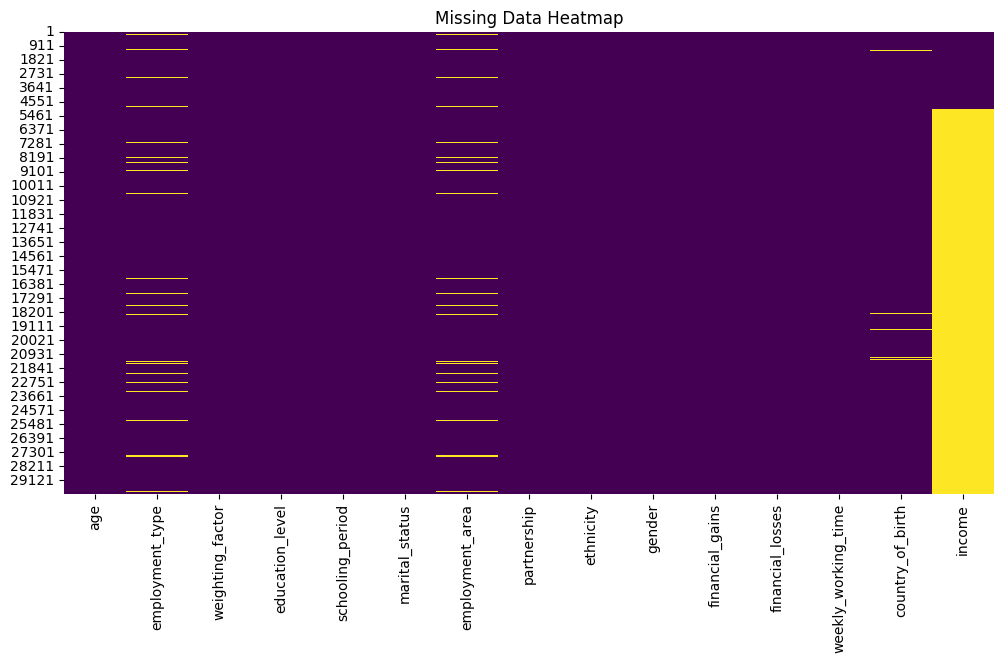

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


In [ ]:
data.dtypes

,0
age,int64
employment_type,object
weighting_factor,int64
education_level,object
schooling_period,int64
marital_status,object
employment_area,object
partnership,object
ethnicity,object
gender,object


In [ ]:
len(data)

30000

#Split the dataset two parts, with target and without target

In [ ]:
# Data with target variable
data_with_target = data[data['income'].notnull()]

# Data without target variable
data_without_target = data[data['income'].isnull()]

In [ ]:
data_with_target.head()

,age,employment_type,weighting_factor,education_level,schooling_period,marital_status,employment_area,partnership,ethnicity,gender,financial_gains,financial_losses,weekly_working_time,country_of_birth,income
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data_with_target['income'].isna().sum()

0

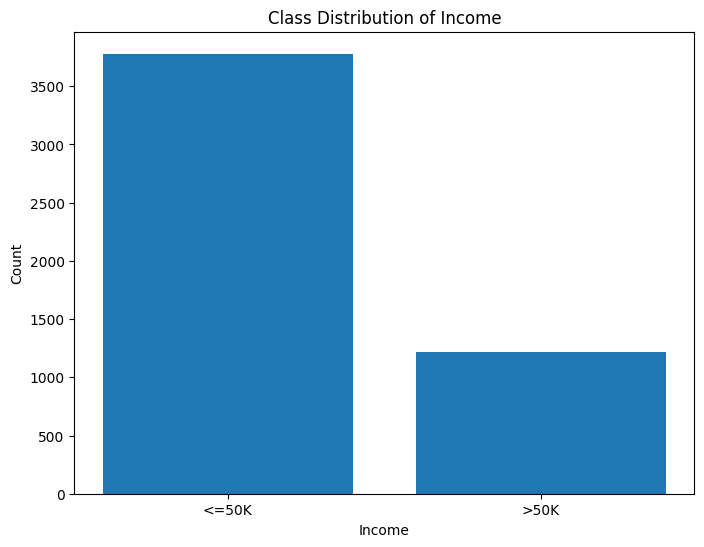

In [ ]:
import matplotlib.pyplot as plt

# Get the class distribution
class_distribution = data_with_target['income'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Class Distribution of Income")
plt.show()

#Train Test and Val Split

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data_with_target.drop('income', axis=1)
y = data_with_target['income']

# First split: Training set and temporary set
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Second split: Validation and Test sets from the temporary set
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
print("Training set class distribution:")
print(y_train.value_counts())

print("\nValidation set class distribution:")
print(y_val.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())


Training set class distribution:
income
<=50K    2645
>50K      855
Name: count, dtype: int64

Validation set class distribution:
income
<=50K    567
>50K     183
Name: count, dtype: int64

Test set class distribution:
income
<=50K    567
>50K     183
Name: count, dtype: int64


In [ ]:
print("\nSizes of each set:")
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])



Sizes of each set:
Training set size: 3500
Validation set size: 750
Test set size: 750


#Fill Missing values with KNN mode

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mode

# Function to fill missing values with mode from neighboring rows with fallback to global mode
def fill_with_mode_fallback(data, column, window=6):
    global_mode = data[column].mode()[0]  # Calculate the global mode of the column

    for idx in data[data[column].isna()].index:
        # Since we reset the index, idx is an integer position
        # Get the rows above and below the missing value
        start_idx = max(0, idx - window)
        end_idx = min(len(data), idx + window + 1)
        neighbors = data[column].iloc[start_idx:end_idx]

        # Calculate the mode of neighboring rows, excluding NaN values
        neighbors_mode = neighbors.dropna().mode()

        if not neighbors_mode.empty:
            # Replace the missing value with the mode of the neighbors
            data.at[idx, column] = neighbors_mode[0]
        else:
            # Fallback: if no neighbors are valid, use the global mode
            data.at[idx, column] = global_mode

# Reset the index of the training data
X_train.reset_index(drop=True, inplace=True) #change inplace=True

# Impute missing values in the training data
fill_with_mode_fallback(X_train, 'country_of_birth')
fill_with_mode_fallback(X_train, 'employment_area')
fill_with_mode_fallback(X_train, 'employment_type')


#Calculate Global Modes from Training Data

In [ ]:
# Calculate global modes from training data
global_mode_country = X_train['country_of_birth'].mode()[0]
global_mode_employment_area = X_train['employment_area'].mode()[0]
global_mode_employment_type = X_train['employment_type'].mode()[0]


#Impute Missing Values in Validation and Test Sets

In [ ]:
# Impute missing values in validation data
X_val['country_of_birth'].fillna(global_mode_country, inplace=True)
X_val['employment_area'].fillna(global_mode_employment_area, inplace=True)
X_val['employment_type'].fillna(global_mode_employment_type, inplace=True)

# Impute missing values in test data
X_test['country_of_birth'].fillna(global_mode_country, inplace=True)
X_test['employment_area'].fillna(global_mode_employment_area, inplace=True)
X_test['employment_type'].fillna(global_mode_employment_type, inplace=True)


<ipython-input-98-bebea19d8b7e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_val['country_of_birth'].fillna(global_mode_country, inplace=True)
<ipython-input-98-bebea19d8b7e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [ ]:
print("Missing values in training set:\n", X_train.isnull().sum())
print("\nMissing values in validation set:\n", X_val.isnull().sum())
print("\nMissing values in test set:\n", X_test.isnull().sum())


Missing values in training set:
 age                    0
employment_type        0
weighting_factor       0
education_level        0
schooling_period       0
marital_status         0
employment_area        0
partnership            0
ethnicity              0
gender                 0
financial_gains        0
financial_losses       0
weekly_working_time    0
country_of_birth       0
dtype: int64

Missing values in validation set:
 age                    0
employment_type        0
weighting_factor       0
education_level        0
schooling_period       0
marital_status         0
employment_area        0
partnership            0
ethnicity              0
gender                 0
financial_gains        0
financial_losses       0
weekly_working_time    0
country_of_birth       0
dtype: int64

Missing values in test set:
 age                    0
employment_type        0
weighting_factor       0
education_level        0
schooling_period       0
marital_status         0
employment_area        0


#Copy the Train Test Val sets for two algorithms

In [ ]:
# Copy for Random Forest
X_train_rf = X_train.copy()
X_val_rf = X_val.copy()
X_test_rf = X_test.copy()

# Target variable
y_train_rf = y_train.copy()
y_val_rf = y_val.copy()
y_test_rf = y_test.copy()


In [ ]:
# Copy for Logistic Regression
X_train_lr = X_train.copy()
X_val_lr = X_val.copy()
X_test_lr = X_test.copy()

# Target variable
y_train_lr = y_train.copy()
y_val_lr = y_val.copy()
y_test_lr = y_test.copy()


In [ ]:
# Check the distribution of the target variable in the training sets
print("Random Forest Training Target Distribution:")
print(y_train_rf.value_counts())

print("\nLogistic Regression Training Target Distribution:")
print(y_train_lr.value_counts())


Random Forest Training Target Distribution:
income
<=50K    2645
>50K      855
Name: count, dtype: int64

Logistic Regression Training Target Distribution:
income
<=50K    2645
>50K      855
Name: count, dtype: int64


#Transform Maritial Status Column to 0, 1

In [ ]:
marital_status_mapping = {
    'Divorced': 0,
    'Never-married': 0,
    'Separated': 0,
    'Widowed': 0,
    'Married-AF-spouse': 1,
    'Married-civ-spouse': 1,
    'Married-spouse-absent': 1
}

#For Logistic Regression Datasets
# Training set
X_train_lr['marital_status'] = X_train_lr['marital_status'].replace(marital_status_mapping)
# Validation set
X_val_lr['marital_status'] = X_val_lr['marital_status'].replace(marital_status_mapping)
# Test set
X_test_lr['marital_status'] = X_test_lr['marital_status'].replace(marital_status_mapping)


#For Random Forest Datasets
# Training set
X_train_rf['marital_status'] = X_train_rf['marital_status'].replace(marital_status_mapping)
# Validation set
X_val_rf['marital_status'] = X_val_rf['marital_status'].replace(marital_status_mapping)
# Test set
X_test_rf['marital_status'] = X_test_rf['marital_status'].replace(marital_status_mapping)


<ipython-input-103-d73796bff61c>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_lr['marital_status'] = X_train_lr['marital_status'].replace(marital_status_mapping)
<ipython-input-103-d73796bff61c>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_val_lr['marital_status'] = X_val_lr['marital_status'].replace(marital_status_mapping)
<ipython-input-103-d73796bff61c>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `resu

In [ ]:
# For Logistic Regression Training Set
print("Unique values in 'marital_status' after mapping (LR Training Set):")
print(X_train_lr['marital_status'].unique())

# For Random Forest Training Set
print("Unique values in 'marital_status' after mapping (RF Training Set):")
print(X_train_rf['marital_status'].unique())


Unique values in 'marital_status' after mapping (LR Training Set):
[0 1]
Unique values in 'marital_status' after mapping (RF Training Set):
[0 1]


In [ ]:
X_train_lr.head()

,age,employment_type,weighting_factor,education_level,schooling_period,marital_status,employment_area,partnership,ethnicity,gender,financial_gains,financial_losses,weekly_working_time,country_of_birth
0,20,Private,188300,Some-college,10,0,Tech-support,Own-child,White,Female,0,0,40,United-States
1,19,Private,262601,HS-grad,9,0,Other-service,Own-child,White,Female,0,0,14,United-States
2,43,Private,161226,Bachelors,13,1,Machine-op-inspct,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States
3,48,Private,242406,11th,7,0,Machine-op-inspct,Unmarried,White,Male,0,0,40,Puerto-Rico
4,51,Federal-gov,45334,Some-college,10,1,Protective-serv,Husband,Asian-Pac-Islander,Male,0,0,70,United-States


In [ ]:
X_train_rf.head()

,age,employment_type,weighting_factor,education_level,schooling_period,marital_status,employment_area,partnership,ethnicity,gender,financial_gains,financial_losses,weekly_working_time,country_of_birth
0,20,Private,188300,Some-college,10,0,Tech-support,Own-child,White,Female,0,0,40,United-States
1,19,Private,262601,HS-grad,9,0,Other-service,Own-child,White,Female,0,0,14,United-States
2,43,Private,161226,Bachelors,13,1,Machine-op-inspct,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States
3,48,Private,242406,11th,7,0,Machine-op-inspct,Unmarried,White,Male,0,0,40,Puerto-Rico
4,51,Federal-gov,45334,Some-college,10,1,Protective-serv,Husband,Asian-Pac-Islander,Male,0,0,70,United-States


#Grouping the categorical values

In [ ]:
# Mapping for 'employment_type'
employment_type_mapping = {
    'Private': 'Private Sector',
    'Self-emp-not-inc': 'Self-Employed',
    'Self-emp-inc': 'Self-Employed',
    'Federal-gov': 'Government',
    'Local-gov': 'Government',
    'State-gov': 'Government',
    'Without-pay': 'Unemployed',
    'Never-worked': 'Unemployed'
}

# Mapping for 'partnership'
partnership_mapping = {
    'Wife': 'Married',
    'Husband': 'Married',
    'Own-child': 'Family',
    'Not-in-family': 'Non-family',
    'Other-relative': 'Family',
    'Unmarried': 'Single'
}

# Mapping for 'employment_area'
employment_area_mapping = {
    'Tech-support': 'Technical',
    'Craft-repair': 'Technical',
    'Other-service': 'Service',
    'Sales': 'Sales',
    'Exec-managerial': 'Management',
    'Prof-specialty': 'Professional',
    'Handlers-cleaners': 'Service',
    'Machine-op-inspct': 'Technical',
    'Adm-clerical': 'Admin',
    'Farming-fishing': 'Primary Sector',
    'Transport-moving': 'Transport',
    'Priv-house-serv': 'Service',
    'Protective-serv': 'Security',
    'Armed-Forces': 'Security'
}

# Mapping for 'country_of_birth'
country_of_birth_mapping = {
    'United-States': 'North America',
    'Canada': 'North America',
    'Puerto-Rico': 'North America',
    'Outlying-US(Guam-USVI-etc)': 'North America',
    'Jamaica': 'Caribbean',
    'Dominican-Republic': 'Caribbean',
    'Haiti': 'Caribbean',
    'Trinadad&Tobago': 'Caribbean',
    'Mexico': 'North America',
    'Honduras': 'Central America',
    'Guatemala': 'Central America',
    'Nicaragua': 'Central America',
    'El-Salvador': 'Central America',
    'Ecuador': 'South America',
    'Peru': 'South America',
    'Columbia': 'South America',
    'England': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Ireland': 'Europe',
    'France': 'Europe',
    'Scotland': 'Europe',
    'Hungary': 'Europe',
    'Yugoslavia': 'Europe',
    'Holand-Netherlands': 'Europe',
    'India': 'Asia',
    'Japan': 'Asia',
    'China': 'Asia',
    'Philippines': 'Asia',
    'Vietnam': 'Asia',
    'Laos': 'Asia',
    'Taiwan': 'Asia',
    'Thailand': 'Asia',
    'Hong Kong': 'Asia',
    'Iran': 'Middle East',
    'Cuba': 'Caribbean'
}


In [ ]:
#For Logistic Regression Datasets

# Employment Type
X_train_lr['employment_type'] = X_train_lr['employment_type'].replace(employment_type_mapping)
X_val_lr['employment_type'] = X_val_lr['employment_type'].replace(employment_type_mapping)
X_test_lr['employment_type'] = X_test_lr['employment_type'].replace(employment_type_mapping)

# Partnership
X_train_lr['partnership'] = X_train_lr['partnership'].replace(partnership_mapping)
X_val_lr['partnership'] = X_val_lr['partnership'].replace(partnership_mapping)
X_test_lr['partnership'] = X_test_lr['partnership'].replace(partnership_mapping)

# Employment Area
X_train_lr['employment_area'] = X_train_lr['employment_area'].replace(employment_area_mapping)
X_val_lr['employment_area'] = X_val_lr['employment_area'].replace(employment_area_mapping)
X_test_lr['employment_area'] = X_test_lr['employment_area'].replace(employment_area_mapping)

# Country of Birth
X_train_lr['country_of_birth'] = X_train_lr['country_of_birth'].replace(country_of_birth_mapping)
X_val_lr['country_of_birth'] = X_val_lr['country_of_birth'].replace(country_of_birth_mapping)
X_test_lr['country_of_birth'] = X_test_lr['country_of_birth'].replace(country_of_birth_mapping)


In [ ]:
#For Random Forest Datasets

# Employment Type
X_train_rf['employment_type'] = X_train_rf['employment_type'].replace(employment_type_mapping)
X_val_rf['employment_type'] = X_val_rf['employment_type'].replace(employment_type_mapping)
X_test_rf['employment_type'] = X_test_rf['employment_type'].replace(employment_type_mapping)

# Partnership
X_train_rf['partnership'] = X_train_rf['partnership'].replace(partnership_mapping)
X_val_rf['partnership'] = X_val_rf['partnership'].replace(partnership_mapping)
X_test_rf['partnership'] = X_test_rf['partnership'].replace(partnership_mapping)

# Employment Area
X_train_rf['employment_area'] = X_train_rf['employment_area'].replace(employment_area_mapping)
X_val_rf['employment_area'] = X_val_rf['employment_area'].replace(employment_area_mapping)
X_test_rf['employment_area'] = X_test_rf['employment_area'].replace(employment_area_mapping)

# Country of Birth
X_train_rf['country_of_birth'] = X_train_rf['country_of_birth'].replace(country_of_birth_mapping)
X_val_rf['country_of_birth'] = X_val_rf['country_of_birth'].replace(country_of_birth_mapping)
X_test_rf['country_of_birth'] = X_test_rf['country_of_birth'].replace(country_of_birth_mapping)


In [ ]:
# For Logistic Regression Training Set
print("Unique values in 'employment_type' (LR Training Set):")
print(X_train_lr['employment_type'].unique())

print("\nUnique values in 'partnership' (LR Training Set):")
print(X_train_lr['partnership'].unique())

print("\nUnique values in 'employment_area' (LR Training Set):")
print(X_train_lr['employment_area'].unique())

print("\nUnique values in 'country_of_birth' (LR Training Set):")
print(X_train_lr['country_of_birth'].unique())


Unique values in 'employment_type' (LR Training Set):
['Private Sector' 'Government' 'Self-Employed' 'Unemployed']

Unique values in 'partnership' (LR Training Set):
['Family' 'Married' 'Single' 'Non-family']

Unique values in 'employment_area' (LR Training Set):
['Technical' 'Service' 'Security' 'Admin' 'Professional' 'Management'
 'Sales' 'Transport' 'Primary Sector']

Unique values in 'country_of_birth' (LR Training Set):
['North America' 'Caribbean' 'South America' 'Central America' 'Cambodia'
 'Asia' 'Europe' 'Middle East' 'South']


In [ ]:
# Check columns in Logistic Regression training set
X_train_lr.head()

,age,employment_type,weighting_factor,education_level,schooling_period,marital_status,employment_area,partnership,ethnicity,gender,financial_gains,financial_losses,weekly_working_time,country_of_birth
0,20,Private Sector,188300,Some-college,10,0,Technical,Family,White,Female,0,0,40,North America
1,19,Private Sector,262601,HS-grad,9,0,Service,Family,White,Female,0,0,14,North America
2,43,Private Sector,161226,Bachelors,13,1,Technical,Married,Amer-Indian-Eskimo,Male,0,0,40,North America
3,48,Private Sector,242406,11th,7,0,Technical,Single,White,Male,0,0,40,North America
4,51,Government,45334,Some-college,10,1,Security,Married,Asian-Pac-Islander,Male,0,0,70,North America


In [ ]:
# Check columns in Random Forest training set
X_train_rf.head()

,age,employment_type,weighting_factor,education_level,schooling_period,marital_status,employment_area,partnership,ethnicity,gender,financial_gains,financial_losses,weekly_working_time,country_of_birth
0,20,Private Sector,188300,Some-college,10,0,Technical,Family,White,Female,0,0,40,North America
1,19,Private Sector,262601,HS-grad,9,0,Service,Family,White,Female,0,0,14,North America
2,43,Private Sector,161226,Bachelors,13,1,Technical,Married,Amer-Indian-Eskimo,Male,0,0,40,North America
3,48,Private Sector,242406,11th,7,0,Technical,Single,White,Male,0,0,40,North America
4,51,Government,45334,Some-college,10,1,Security,Married,Asian-Pac-Islander,Male,0,0,70,North America


#Data Encoding for logistic regression

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Label Encode the 'income' target variable for logistic regression

# Initialize the LabelEncoder for logistic regression
label_encoder_lr = LabelEncoder()

# Fit the label encoder on the training target variable
y_train_lr_encoded = label_encoder_lr.fit_transform(y_train_lr)

# Transform the validation and test target variables using the same encoder
y_val_lr_encoded = label_encoder_lr.transform(y_val_lr)
y_test_lr_encoded = label_encoder_lr.transform(y_test_lr)

# Step 2: One-Hot Encode the categorical features in the training set for logistic regression

# List of categorical features to encode using one-hot encoding
features_to_encode_lr = [
    'employment_type', 'marital_status', 'education_level', 'employment_area',
    'partnership', 'ethnicity', 'gender', 'country_of_birth'
]

# Apply one-hot encoding using pandas.get_dummies and ensure the result is in 0/1 (integer) format
X_train_lr_encoded = pd.get_dummies(X_train_lr, columns=features_to_encode_lr, drop_first=True).astype(int)

# Step 3: Apply the same one-hot encoding to the validation and test sets

# One-hot encoding for validation data, ensuring 0/1 (integer) format
X_val_lr_encoded = pd.get_dummies(X_val_lr, columns=features_to_encode_lr, drop_first=True).astype(int)

# One-hot encoding for test data, ensuring 0/1 (integer) format
X_test_lr_encoded = pd.get_dummies(X_test_lr, columns=features_to_encode_lr, drop_first=True).astype(int)

# Ensure that the validation and test sets have the same columns as the training set
# Reindex the validation and test sets to have the same columns as the training set (adding any missing columns and filling them with 0s)
X_val_lr_encoded = X_val_lr_encoded.reindex(columns=X_train_lr_encoded.columns, fill_value=0)
X_test_lr_encoded = X_test_lr_encoded.reindex(columns=X_train_lr_encoded.columns, fill_value=0)

In [ ]:
# Step 4: Combine the preprocessed features and the encoded target variable for training set

# Convert y_train_lr_encoded (NumPy array) to a DataFrame
y_train_lr_encoded_df = pd.DataFrame(y_train_lr_encoded, columns=['income'], index=X_train_lr_encoded.index)

# Combine the preprocessed features and the encoded target variable
train_data_with_target_lr = pd.concat([X_train_lr_encoded, y_train_lr_encoded_df], axis=1)

# Display the first few rows of the encoded dataset
train_data_with_target_lr.head()

,age,weighting_factor,schooling_period,financial_gains,financial_losses,weekly_working_time,employment_type_Private Sector,employment_type_Self-Employed,employment_type_Unemployed,marital_status_1,...,gender_Male,country_of_birth_Cambodia,country_of_birth_Caribbean,country_of_birth_Central America,country_of_birth_Europe,country_of_birth_Middle East,country_of_birth_North America,country_of_birth_South,country_of_birth_South America,income
0,20,188300,10,0,0,40,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,19,262601,9,0,0,14,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,43,161226,13,0,0,40,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3,48,242406,7,0,0,40,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,51,45334,10,0,0,70,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


#Data Encoding for Random Forest

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Label Encode the 'income' target variable

# Initialize the LabelEncoder
label_encoder_rf = LabelEncoder()

# Fit the label encoder on the training target variable
y_train_rf_encoded = label_encoder_rf.fit_transform(y_train_rf)

# Transform the validation and test target variables using the same encoder
y_val_rf_encoded = label_encoder_rf.transform(y_val_rf)
y_test_rf_encoded = label_encoder_rf.transform(y_test_rf)

# Now, 'income' is encoded into numerical values:
# For example, ' <=50K' might be encoded as 0, and ' >50K' as 1.

# Step 2: One-Hot Encode the categorical features in the training set

# List of categorical features to encode using one-hot encoding
features_to_encode_rf = [
    'employment_type', 'marital_status', 'education_level', 'employment_area',
    'partnership', 'ethnicity', 'gender', 'country_of_birth'
]

# Apply one-hot encoding using pandas.get_dummies and ensure the result is in 0/1 (integer) format
X_train_rf_encoded = pd.get_dummies(X_train_rf, columns=features_to_encode_rf, drop_first=True).astype(int)

# Step 3: Apply the same one-hot encoding to the validation and test sets

# One-hot encoding for validation data, ensuring 0/1 (integer) format
X_val_rf_encoded = pd.get_dummies(X_val_rf, columns=features_to_encode_rf, drop_first=True).astype(int)

# One-hot encoding for test data, ensuring 0/1 (integer) format
X_test_rf_encoded = pd.get_dummies(X_test_rf, columns=features_to_encode_rf, drop_first=True).astype(int)

# Ensure that the validation and test sets have the same columns as the training set
# Reindex the validation and test sets to have the same columns as the training set (adding any missing columns and filling them with 0s)
X_val_rf_encoded = X_val_rf_encoded.reindex(columns=X_train_rf_encoded.columns, fill_value=0)
X_test_rf_encoded = X_test_rf_encoded.reindex(columns=X_train_rf_encoded.columns, fill_value=0)

In [ ]:
# Step 4: Combine the preprocessed features and the encoded target variable for training set

# Convert y_train_rf_encoded (NumPy array) to a DataFrame
y_train_rf_encoded_df = pd.DataFrame(y_train_rf_encoded, columns=['income'], index=X_train_rf_encoded.index)

# Combine the preprocessed features and the encoded target variable
train_data_with_target_rf = pd.concat([X_train_rf_encoded, y_train_rf_encoded_df], axis=1)

# Display the first few rows
train_data_with_target_rf.head()

,age,weighting_factor,schooling_period,financial_gains,financial_losses,weekly_working_time,employment_type_Private Sector,employment_type_Self-Employed,employment_type_Unemployed,marital_status_1,...,gender_Male,country_of_birth_Cambodia,country_of_birth_Caribbean,country_of_birth_Central America,country_of_birth_Europe,country_of_birth_Middle East,country_of_birth_North America,country_of_birth_South,country_of_birth_South America,income
0,20,188300,10,0,0,40,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,19,262601,9,0,0,14,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,43,161226,13,0,0,40,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3,48,242406,7,0,0,40,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,51,45334,10,0,0,70,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


#Correlation of features with target variable

In [ ]:
# Compute the correlation matrix
corr_matrix_rf = train_data_with_target_rf.corr()

# Extract correlations with the target variable 'income'
corr_with_target_rf = corr_matrix_rf['income'].drop('income')

# Get absolute correlation values and sort
corr_with_target_rf_abs = corr_with_target_rf.abs().sort_values(ascending=False)

# Display the top 10 features most correlated with the target variable
print("Top 10 features correlated with the target variable (Random Forest):")
print(corr_with_target_rf_abs.head(10))


Top 10 features correlated with the target variable (Random Forest):
partnership_Married           0.461355
marital_status_1              0.453184
schooling_period              0.319138
weekly_working_time           0.238172
age                           0.220663
financial_gains               0.219512
employment_area_Management    0.204136
partnership_Non-family        0.200216
gender_Male                   0.197488
employment_area_Service       0.172880
Name: income, dtype: float64


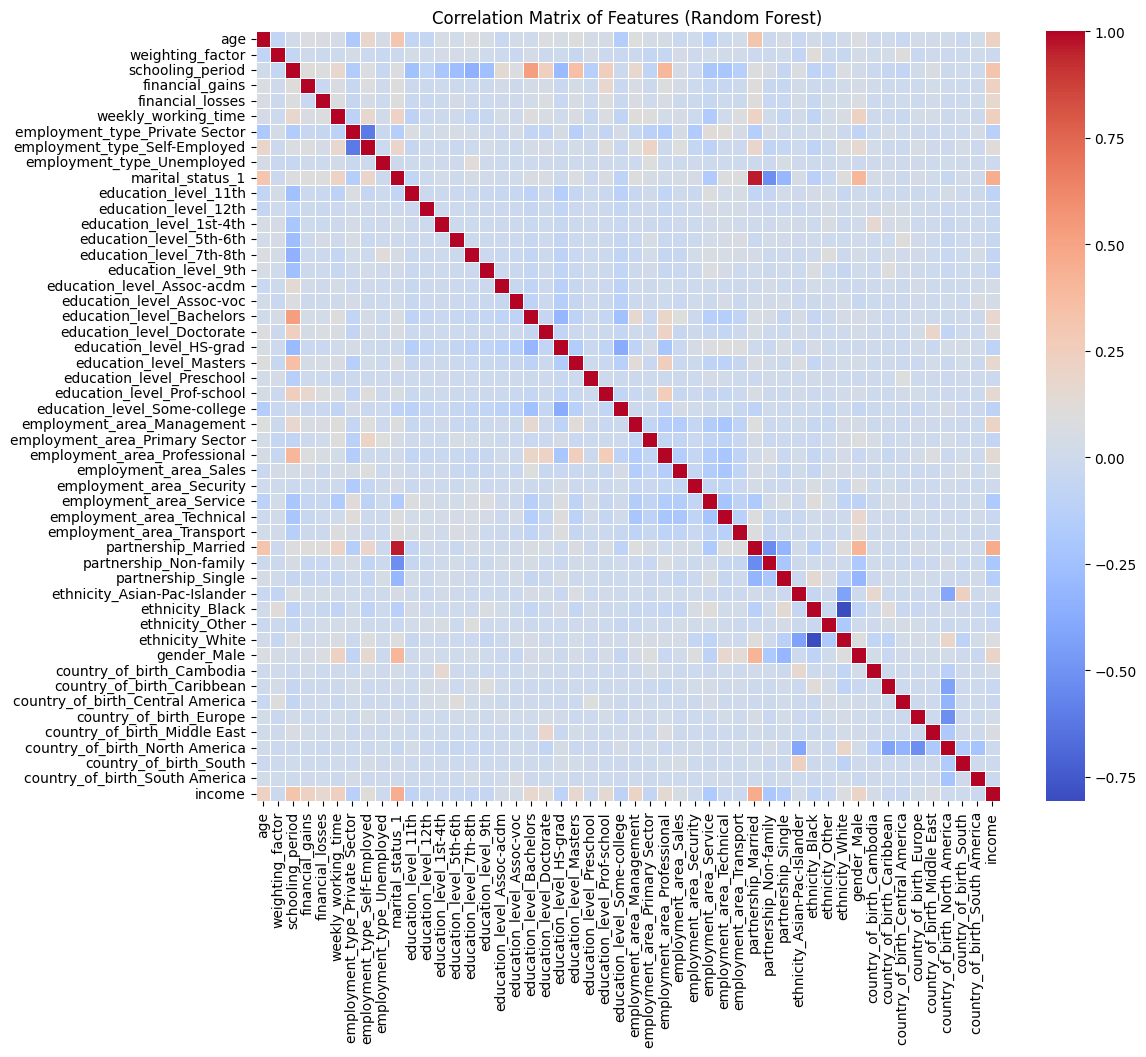

In [ ]:
import seaborn as sns

# Compute the correlation matrix
corr_rf = train_data_with_target_rf.corr()

# Plot the correlation matrix heatmap with annotations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_rf, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features (Random Forest)')
plt.show()

In [ ]:
print("Training set class distribution:")
print(y_train_rf.value_counts())

print("\nValidation set class distribution:")
print(y_val_rf.value_counts())

print("\nTest set class distribution:")
print(y_test_rf.value_counts())

Training set class distribution:
income
<=50K    2645
>50K      855
Name: count, dtype: int64

Validation set class distribution:
income
<=50K    567
>50K     183
Name: count, dtype: int64

Test set class distribution:
income
<=50K    567
>50K     183
Name: count, dtype: int64


In [ ]:
# from sklearn.model_selection import train_test_split
# from imblearn.combine import SMOTETomek

# # Assuming 'data_encoded' is your DataFrame and 'income' is the target variable
# X = data_encoded.drop('income', axis=1)
# y = data_encoded['income']

# # Split into training and temporary sets (75% train, 25% temp)
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# # Upsample only the training set
# smotetomek = SMOTETomek(random_state=42)
# X_train_resampled, y_train_resampled = smotetomek.fit_resample(X_train, y_train)

# # Split the temporary set into validation and test sets (70% validation, 30% test)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# X_train_lr = X_train_resampled.copy()
# y_train_lr = y_train_resampled.copy()


In [ ]:
# # Check the class distribution in each set
# print("Training set class distribution:", y_train_resampled.value_counts())
# print("Test set class distribution:", y_test.value_counts())
# print("Validation set class distribution:", y_val.value_counts())

In [ ]:
# import matplotlib.pyplot as plt

# # Select desired features
# features = ['age', 'weighting_factor', 'schooling_period', 'financial_gains', 'financial_losses', 'weekly_working_time']
# X_subset = X_train_resampled[features]

# # Combine features and income for plotting
# data_subset = pd.concat([X_subset, y_train_resampled], axis=1)

# # Create histograms for selected features and income
# data_subset.hist(figsize=(8, 8))
# plt.suptitle('Data Distribution in Training Set (Upsampled)', fontsize=16)
# plt.show()

#Random Forest

In [ ]:
# Step 1: Train the Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train_rf_encoded, y_train_rf_encoded)
print("Random Forest model has been trained.")

Random Forest model has been trained.


In [ ]:
# Step 2: Evaluate the Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_val_rf_pred = rf_model.predict(X_test_rf_encoded)

print(classification_report(y_test_rf_encoded, y_val_rf_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       567
           1       0.69      0.68      0.69       183

    accuracy                           0.85       750
   macro avg       0.79      0.79      0.79       750
weighted avg       0.85      0.85      0.85       750



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test_rf_encoded, y_val_rf_pred)

print(conf_matrix)


[[511  56]
 [ 58 125]]


In [ ]:
accuracy = accuracy_score(y_test_rf_encoded, y_val_rf_pred)
print(f"Accuracy of Random Forest: {accuracy:.4f}")

Accuracy of Random Forest: 0.8480


In [ ]:
# Step 3: Extract and Display Feature Importances
feature_importances_rf = pd.Series(
rf_model.feature_importances_,
index=X_train_rf_encoded.columns
)
feature_importances_rf_sorted = feature_importances_rf.sort_values(ascending=False)

print("Top 14 Feature Importances from Random Forest:")
print(feature_importances_rf_sorted.head(14))

Top 14 Feature Importances from Random Forest:
age                               0.155553
weighting_factor                  0.146604
financial_gains                   0.096289
partnership_Married               0.094800
weekly_working_time               0.089650
schooling_period                  0.071447
marital_status_1                  0.064101
financial_losses                  0.031649
employment_area_Management        0.023667
gender_Male                       0.019927
employment_type_Private Sector    0.017844
employment_area_Professional      0.013501
employment_area_Sales             0.012549
employment_type_Self-Employed     0.012393
dtype: float64


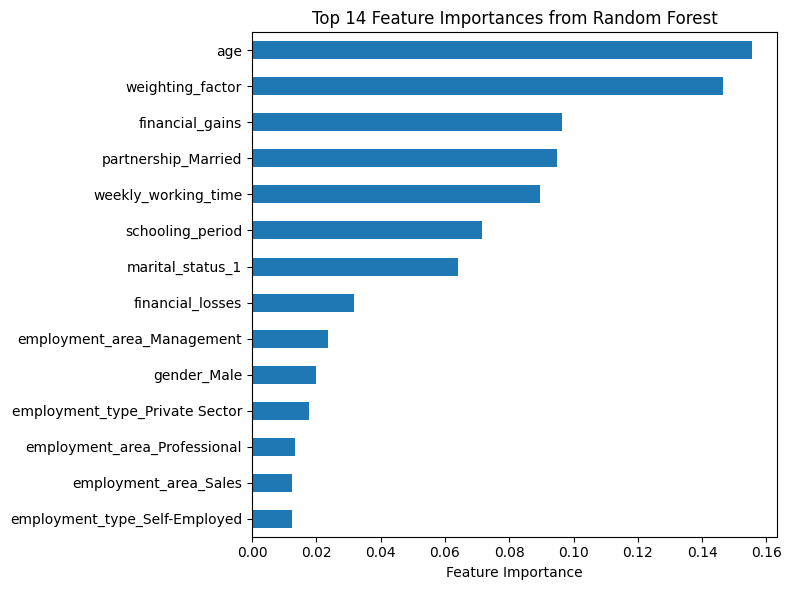

In [ ]:
# Step 4: Visualize the Feature Importances
plt.figure(figsize=(8, 6))
feature_importances_rf_sorted.head(14).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Top 14 Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Combine the preprocessed features and the encoded target variable
train_data_with_target_rf = pd.concat(
    [X_train_rf_encoded, y_train_rf_encoded_df], axis=1
)

# Compute the correlation matrix
corr_matrix_rf = train_data_with_target_rf.corr()

# Extract correlations with the target variable 'income'
corr_with_target_rf = corr_matrix_rf['income'].drop('income')

# Get absolute correlation values and sort
corr_with_target_rf_abs = corr_with_target_rf.abs().sort_values(ascending=False)

# Display the top 10 features most correlated with the target variable
print("Top 14 features correlated with the target variable (Random Forest):")
print(corr_with_target_rf_abs.head(14))

Top 14 features correlated with the target variable (Random Forest):
partnership_Married            0.461355
marital_status_1               0.453184
schooling_period               0.319138
weekly_working_time            0.238172
age                            0.220663
financial_gains                0.219512
employment_area_Management     0.204136
partnership_Non-family         0.200216
gender_Male                    0.197488
employment_area_Service        0.172880
education_level_Bachelors      0.169482
education_level_Masters        0.164191
financial_losses               0.162815
education_level_Prof-school    0.147381
Name: income, dtype: float64


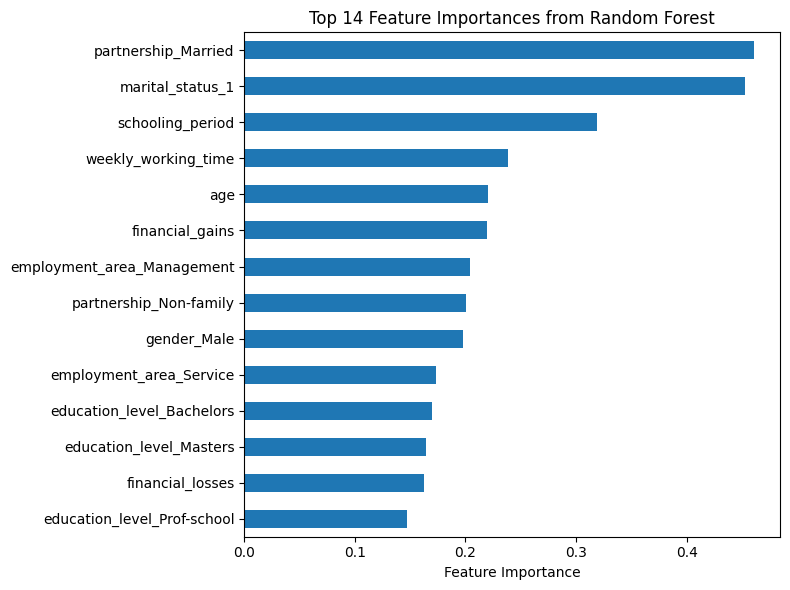

In [ ]:
# Step 4: Visualize the Feature Importances
plt.figure(figsize=(8, 6))
corr_with_target_rf_abs.head(14).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Top 14 Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#AUC and ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the validation set
y_val_rf_prob = rf_model.predict_proba(X_val_rf_encoded)[:, 1]  # Get probabilities for the positive class (income >50K)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_val_rf_encoded, y_val_rf_prob)

# Compute the AUC score
auc_score = roc_auc_score(y_val_rf_encoded, y_val_rf_prob)
print(f"AUC Score: {auc_score:.4f}")



AUC Score: 0.8841


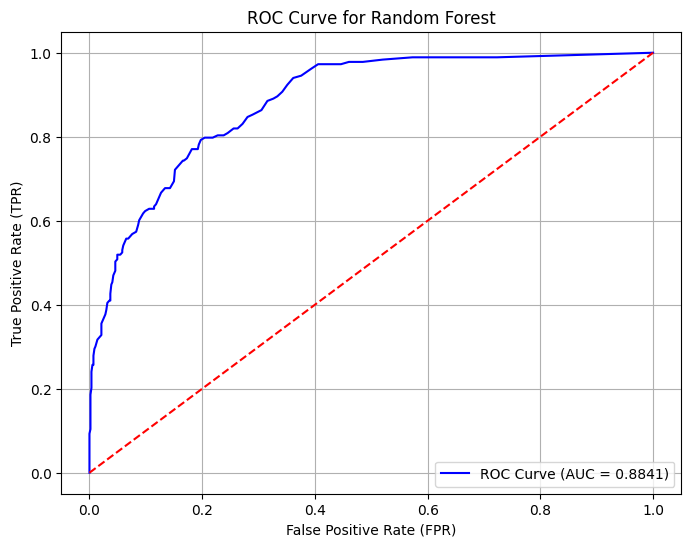

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line for random model
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
# Calculate the difference between TPR and FPR (Youden's J statistic)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")


Optimal Threshold: 0.31


In [ ]:
y_val_probs = rf_model.predict_proba(X_test_rf_encoded)[:, 1]

In [ ]:
threshold = 0.31  # Example threshold
y_val_rf_pred_new = (y_val_probs >= threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_rf_encoded, y_val_rf_pred_new))

conf_matrix_new = confusion_matrix(y_test_rf_encoded, y_val_rf_pred_new)

print(conf_matrix_new)


              precision    recall  f1-score   support

           0       0.94      0.80      0.86       567
           1       0.57      0.85      0.69       183

    accuracy                           0.81       750
   macro avg       0.76      0.82      0.77       750
weighted avg       0.85      0.81      0.82       750

[[451 116]
 [ 27 156]]


#Random Forest with all combination of parameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score

# Define the parameter grid for Random Search (removed 'oob_score' and 'n_jobs')
param_grid = {
    'n_estimators': [50, 200],
    'criterion': ['entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced_subsample'],
    'max_features': [None, 'sqrt'],
    'bootstrap': [True]
}

# Create the RandomForestClassifier object with fixed parameters
rf_classifier = RandomForestClassifier(
    random_state=42,
    oob_score=True,        # Fixed parameter
    n_jobs=-1              # Fixed parameter (if desired)
)

# Inner loop for hyperparameter tuning (cross-validation inside training data)
inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Use RandomizedSearchCV to tune hyperparameters (set n_jobs here if desired)
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_grid,
    n_iter=10,
    cv=inner_cv,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1              # Parallelize the search
)

# Outer loop for model evaluation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform nested cross-validation for model evaluation
nested_scores = cross_val_score(
    random_search,
    X_train_rf_encoded,
    y_train_rf_encoded,
    cv=outer_cv,
    scoring='accuracy',    # Ensure scoring is specified
    n_jobs=-1              # Parallelize cross-validation
)

# Print the nested cross-validation accuracy
print("Nested cross-validation accuracy: {:.4f} ± {:.4f}".format(nested_scores.mean(), nested_scores.std()))

# Fit the random search model on the entire training data to find the best parameters
random_search.fit(X_train_rf_encoded, y_train_rf_encoded)

# Print the best parameters and best score from RandomizedSearchCV
print("Best parameters from RandomizedSearchCV: ", random_search.best_params_)
print("Best score from RandomizedSearchCV: ", random_search.best_score_)


Nested cross-validation accuracy: 0.8306 ± 0.0085


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters from RandomizedSearchCV:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'bootstrap': True}
Best score from RandomizedSearchCV:  0.8371428571428572


In [ ]:
# Retrain the RandomForestClassifier with the best parameters
best_rf_classifier = RandomForestClassifier(
    n_estimators=50,  # Try reducing the number of trees
    min_samples_split=20,  # Prevents small splits
    min_samples_leaf=20,  # Ensures leaves are not too small
    max_features='sqrt',  # Use fewer features per split to prevent overfitting
    max_depth=10,  # Limit depth to prevent overfitting
    criterion='entropy',
    class_weight='balanced_subsample',
    bootstrap=True,
    random_state=42
)


# Fit the model to the entire training set (X_train_rf_encoded and y_train_rf_encoded)
best_rf_classifier.fit(X_train_rf_encoded, y_train_rf_encoded)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, min_samples_leaf=20, min_samples_split=20,
                       n_estimators=50, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the val set
y_pred = best_rf_classifier.predict(X_test_rf_encoded)

# Evaluate the performance
accuracy = accuracy_score(y_test_rf_encoded, y_pred)
print("Test set accuracy: {:.4f}".format(accuracy))

Test set accuracy: 0.7893


In [ ]:
# Print classification report (precision, recall, F1-score)
print(classification_report(y_test_rf_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.76      0.84       567
           1       0.54      0.89      0.67       183

    accuracy                           0.79       750
   macro avg       0.75      0.82      0.76       750
weighted avg       0.85      0.79      0.80       750



In [ ]:
# Print confusion matrix
print(confusion_matrix(y_test_rf_encoded, y_pred))

[[429 138]
 [ 20 163]]


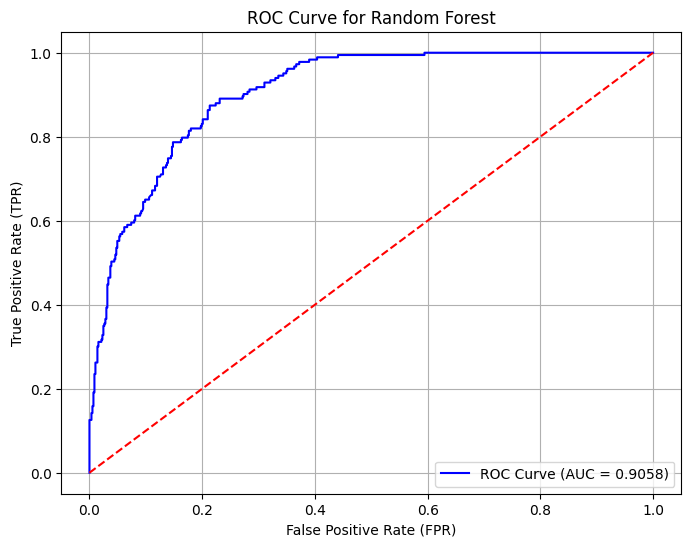

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the validation set
y_val_rf_prob = best_rf_classifier.predict_proba(X_test_rf_encoded)[:, 1]  # Get probabilities for the positive class (income >50K)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_rf_encoded, y_val_rf_prob)

# Compute the AUC score
auc_score = roc_auc_score(y_test_rf_encoded, y_val_rf_prob)
#print(f"AUC Score: {auc_score:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line for random model
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()




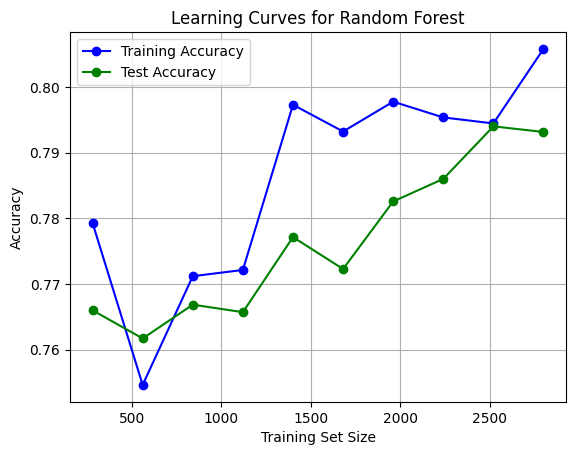

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np # Added import for numpy

# Assuming 'best_rf_classifier' is your trained RandomForestClassifier
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_rf_classifier,  # Use your trained model here
    X=X_train_rf_encoded,
    y=y_train_rf_encoded,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',
    n_jobs=-1  # Use all available cores for parallel processing
)

train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='green', label='Test Accuracy')
plt.title('Learning Curves for Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Initialize the StandardScaler
scaler = StandardScaler()

# 2. Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_lr_encoded)

# 3. Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test_lr_encoded)

# 4. Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=5000)

# 5. Fit the model on the scaled training data
logreg.fit(X_train_scaled, y_train_lr_encoded)

# 6. Predict on the scaled test data
y_pred = logreg.predict(X_test_scaled)

# 7. Calculate the accuracy
accuracy = accuracy_score(y_test_lr_encoded, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy:.4f}")

Accuracy of Logistic Regression: 0.8520


#Model Evaluation of LR

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test_lr_encoded, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       567
           1       0.72      0.65      0.68       183

    accuracy                           0.85       750
   macro avg       0.80      0.78      0.79       750
weighted avg       0.85      0.85      0.85       750



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_lr_encoded, y_pred)

print(conf_matrix)

[[520  47]
 [ 64 119]]


In [ ]:
# Assuming X_val_lr_encoded is your original validation data
X_val_scaled = scaler.transform(X_test_lr_encoded)  # Scale the validation data

# Predict on the scaled validation data
y_pred_val = logreg.predict(X_test_scaled)

# Calculate the accuracy
validation_accuracy = accuracy_score(y_test_lr_encoded, y_pred_val)
print(f"Validation accuracy: {validation_accuracy:.4f}")

Validation accuracy: 0.8520


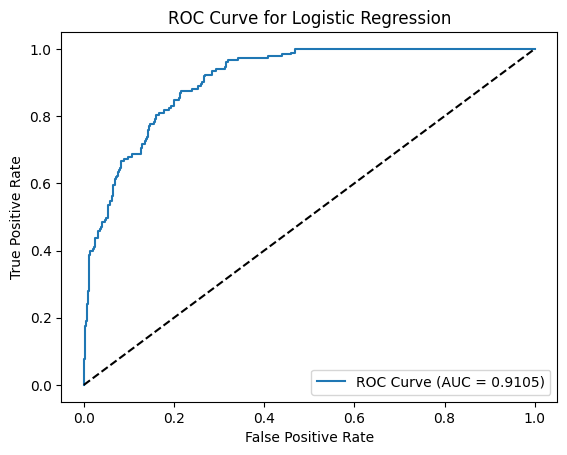

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities for the positive class on the scaled validation data
y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC AUC score
auc_score = roc_auc_score(y_test_lr_encoded, y_pred_prob)
#print(f"ROC AUC Score: {auc_score:.4f}")

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_lr_encoded, y_pred_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--') # Diagonal line for random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate the difference between TPR and FPR (Youden's J statistic)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")


Optimal Threshold: 0.2732959779555623


In [ ]:
# Set the threshold
threshold = 0.3

# Apply thresholding to get predicted classes
y_pred_thresholded = (y_pred_prob >= threshold).astype(int)

# Generate the classification report
print(classification_report(y_test_lr_encoded, y_pred_thresholded))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       567
           1       0.58      0.83      0.68       183

    accuracy                           0.81       750
   macro avg       0.76      0.82      0.77       750
weighted avg       0.85      0.81      0.82       750



In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_lr_encoded, y_pred_thresholded)

print(conf_matrix)


[[457 110]
 [ 32 151]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import make_scorer, accuracy_score

# Define the parameter distribution
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': uniform(loc=0.001, scale=100),
    'solver': ['liblinear', 'saga'],
    'max_iter': [500, 1000, 2000]
}

# Create a LogisticRegression object
logreg = LogisticRegression(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=param_dist,
    n_iter=50,  # Increase the number of iterations
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the random search to the scaled training data
random_search.fit(X_train_scaled, y_train_lr_encoded)

# Print the best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best accuracy:", random_search.best_score_)

# Get the best model
best_logreg = random_search.best_estimator_

Best parameters: {'C': 0.5532117123602399, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy: 0.8371428571428572


#Train LR with Best parameters

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a LogisticRegression object with the best parameters
best_logreg = LogisticRegression(
    C=0.5,
    max_iter=2000,
    penalty='l1',
    solver='liblinear',
    random_state=42  # Add random_state for reproducibility
)

# Fit the model to the scaled training data
best_logreg.fit(X_train_scaled, y_train_lr_encoded)

# Predict on the scaled test data
y_pred_test = best_logreg.predict(X_test_scaled)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test_lr_encoded, y_pred_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.8547


In [ ]:
# Generate the classification report
print(classification_report(y_test_lr_encoded, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       567
           1       0.72      0.66      0.69       183

    accuracy                           0.85       750
   macro avg       0.81      0.79      0.80       750
weighted avg       0.85      0.85      0.85       750



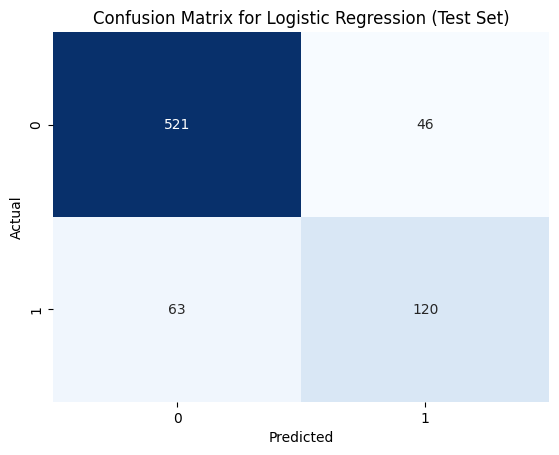

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix for the test set
cm = confusion_matrix(y_test_lr_encoded, y_pred_test)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression (Test Set)')
plt.show()

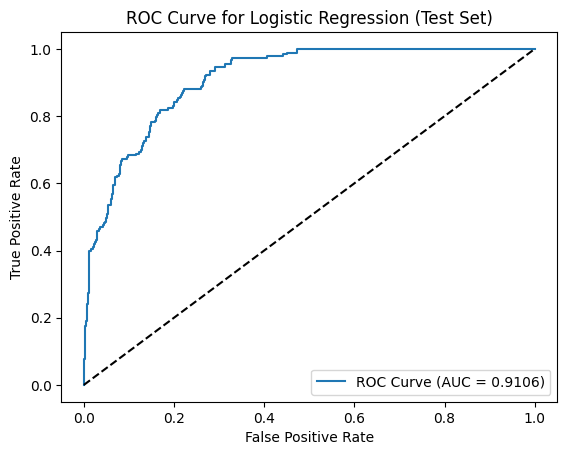

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities for the positive class on the test data
y_pred_prob_test = best_logreg.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC AUC score
auc_score_test = roc_auc_score(y_test_lr_encoded, y_pred_prob_test)
#print(f"ROC AUC Score (Test Set): {auc_score_test:.4f}")

# Calculate the ROC curve
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_lr_encoded, y_pred_prob_test)

# Plot the ROC curve for the test set
plt.figure()
plt.plot(fpr_test, tpr_test, label=f'ROC Curve (AUC = {auc_score_test:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression (Test Set)')
plt.legend(loc="lower right")
plt.show()

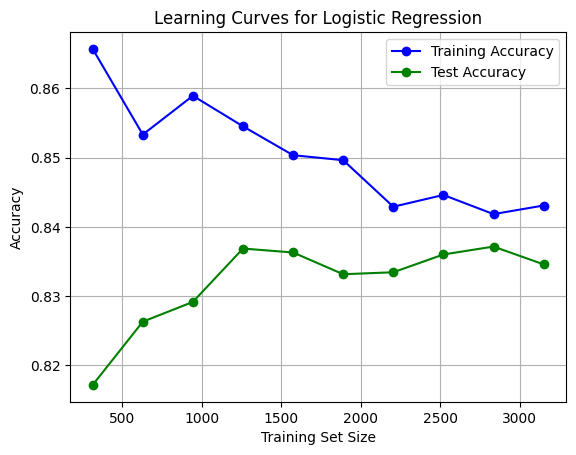

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
from sklearn.linear_model import LogisticRegression

# Assuming best_logreg is your trained Logistic Regression model
# Use learning_curve to get training and validation scores

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_logreg,  # Logistic Regression model
    X=X_train_scaled,       # Training data
    y=y_train_lr_encoded,   # Training target
    train_sizes=np.linspace(0.1, 1.0, 10),  # Training set sizes from 10% to 100%
    cv=10,  # 10-fold cross-validation
    scoring='accuracy',  # Measure accuracy
    n_jobs=-1  # Use all available cores
)

# Calculate mean of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

# Plot training and validation scores
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='green', label='Test Accuracy')
plt.title('Learning Curves for Logistic Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


#Comparison of ROC curve

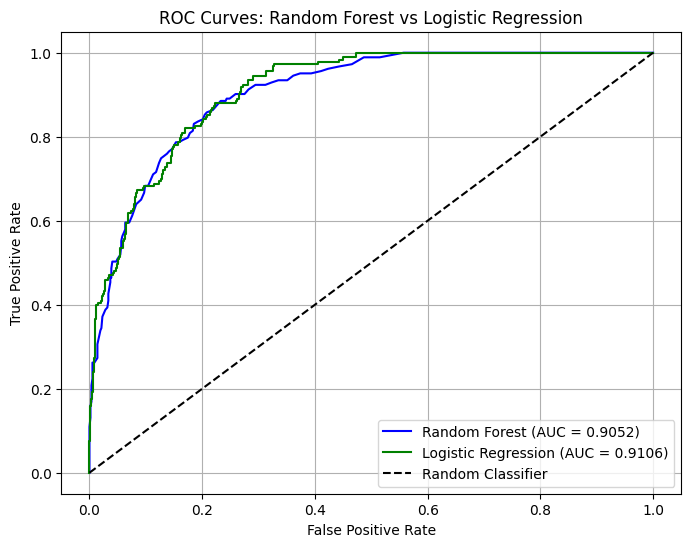

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# --- ROC for Random Forest ---
# Predict probabilities for the positive class on the test data for Random Forest
y_val_rf_prob = rf_model.predict_proba(X_test_rf_encoded)[:, 1]

# Compute the ROC curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_rf_encoded, y_val_rf_prob)

# Compute the AUC score for Random Forest
auc_score_rf = roc_auc_score(y_test_rf_encoded, y_val_rf_prob)


# --- ROC for Logistic Regression ---
# Predict probabilities for the positive class on the test data for Logistic Regression
y_pred_prob_logreg = best_logreg.predict_proba(X_test_scaled)[:, 1]

# Compute the ROC curve for Logistic Regression
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test_lr_encoded, y_pred_prob_logreg)

# Compute the AUC score for Logistic Regression
auc_score_logreg = roc_auc_score(y_test_lr_encoded, y_pred_prob_logreg)


# --- Plot both ROC curves ---
plt.figure(figsize=(8, 6))

# Plot ROC curve for Random Forest
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_score_rf:.4f})', color='blue')

# Plot ROC curve for Logistic Regression
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_score_logreg:.4f})', color='green')

# Diagonal dashed line representing a random model
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Labels and Title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Random Forest vs Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)

# Show plot
plt.show()
